In [1]:
import pickle
import glob
from photutils.psf.epsf_stars import EPSFStar, EPSFStars 
from photutils.psf import EPSFBuilder, EPSFFitter
%matplotlib inline
import matplotlib.pyplot as plt
import photutils
import numpy as np
print('Photutils version = ',photutils.__version__)
filenames = glob.glob('stars/*pickle')
stars = []
for filename in filenames:
    with open(filename,'rb') as f:
        stars.append(pickle.load(f))
stars = EPSFStars(stars)

Photutils version =  1.0.1


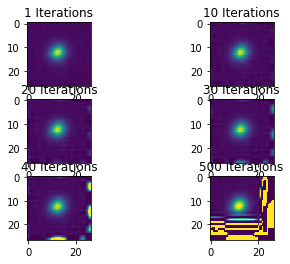

In [17]:
fwhm = 5 #  Pre-measured
fig, axs = plt.subplots(3,2)
epsfs = []
for maxiter,ax in zip([1,10,20,30,40,50,500],axs.flat):
    epsf = EPSFBuilder(oversampling=1,
                   maxiters=maxiter,
                   fitter=EPSFFitter(fit_boxsize=2*fwhm+1),
                   progress_bar=True)(stars)[0] 
    ax.imshow(epsf.data, cmap='viridis',vmin=-0.001,vmax=0.04)
    ax.set_title('{} Iterations'.format(maxiter))
    epsfs.append(epsf.data)

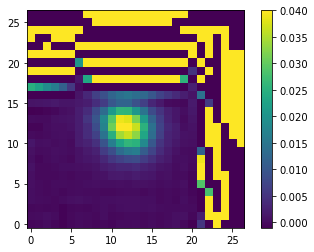

In [25]:
plt.imshow(epsfs[5],cmap='viridis',origin='lower',vmin=-0.001,vmax=0.04)
plt.colorbar()
#plt.xlim(0,23)
#plt.ylim(0,23)

### Check that the stars are ok

(0.0, 1.0, 0.0, 1.0)

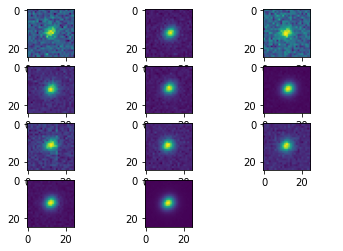

In [29]:
fig, axs = plt.subplots(4,3)
for star,ax in zip(stars,axs.flat):
    ax.imshow(star.data,cmap='viridis')
axs.flatten()[-1].axis('off')

### Clearly getting worse each iteration even though input is good. This behavior does not exist on photutils < 0.7

We have a photometry pipeline running on that version, where we set the maxiters to 500 and it performs very well. The behavior seen above never happens.